In [1]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import statsmodels.api as sm # v 0.13.5
import matplotlib.pyplot as plt # 3.6.3
import seaborn as sns #0. 12. 2


import warnings as ww
import statsmodels.tsa.stattools as stattools  # v 0.13.5

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from statsmodels.tsa.stattools import adfuller # v 0.13.5
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.13.5
from statsmodels.tsa.arima_model import ARIMA # v 0.13.5

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv ("C:/Users/btomi/Downloads/company_bankruptcy_data.csv")

df.shape, df.columns, df.dtypes
#Importing the data and getting some general EDA

((6819, 96),
 Index(['Bankrupt', ' ROA(C) before interest and depreciation before interest',
        ' ROA(A) before interest and % after tax',
        ' ROA(B) before interest and depreciation after tax',
        ' Operating Gross Margin', ' Realized Sales Gross Margin',
        ' Operating Profit Rate', ' Pre-tax net Interest Rate',
        ' After-tax net Interest Rate',
        ' Non-industry income and expenditure/revenue',
        ' Continuous interest rate (after tax)', ' Operating Expense Rate',
        ' Research and development expense rate', ' Cash flow rate',
        ' Interest-bearing debt interest rate', ' Tax rate (A)',
        ' Net Value Per Share (B)', ' Net Value Per Share (A)',
        ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
        ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
        ' Operating Profit Per Share (Yuan ¥)',
        ' Per Share Net profit before tax (Yuan ¥)',
        ' Realized Sales Gross Profit Growth Rate

In [3]:
df.isna().sum()
#checking for missing values

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [4]:
df.describe()
#This gives me the summary statistics of the data set.

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [5]:
df.info()
#More info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
df[' Current Ratio'].describe()
#summary statistics for Current Ratio

count    6.819000e+03
mean     4.032850e+05
std      3.330216e+07
min      0.000000e+00
25%      7.555047e-03
50%      1.058717e-02
75%      1.626953e-02
max      2.750000e+09
Name:  Current Ratio, dtype: float64

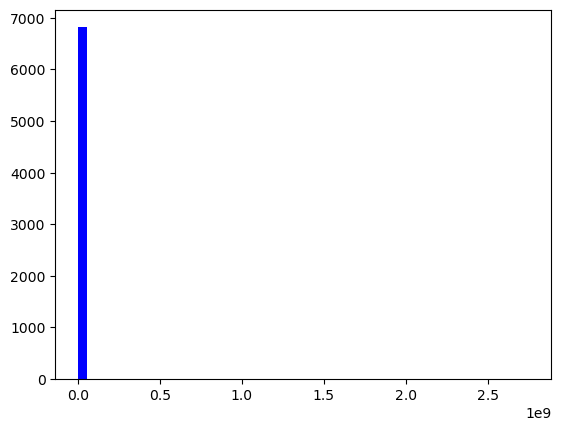

In [7]:
plt.hist(df[' Current Ratio'], bins=50, color='blue')
plt.show()
#Getting the distribution. We can see the majority of current ratio fall betwen 0 and 0.1, while there is high outlier

In [8]:
df[' Current Liability to Equity'].describe()
#summary statistics for Current Liability to Equity

count    6819.000000
mean        0.331410
std         0.013488
min         0.000000
25%         0.328096
50%         0.329685
75%         0.332322
max         1.000000
Name:  Current Liability to Equity, dtype: float64

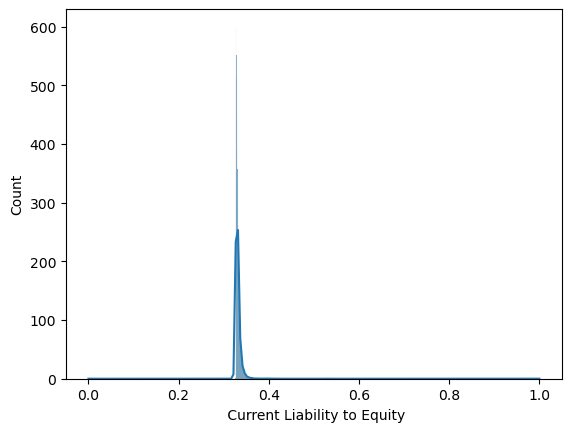

In [9]:
sns.histplot(df[' Current Liability to Equity'], kde=True)
plt.show()
#we see the majority fall betwen 0.3 and 0.35.

In [10]:
df[' Quick Assets/Total Assets'].describe()
#summary statistics for Quick Assets/Total Assets

count    6819.000000
mean        0.400132
std         0.201998
min         0.000000
25%         0.241973
50%         0.386451
75%         0.540594
max         1.000000
Name:  Quick Assets/Total Assets, dtype: float64

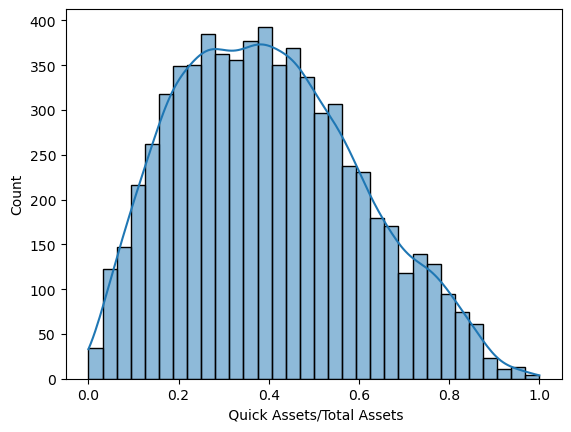

In [11]:
sns.histplot(df[' Quick Assets/Total Assets'], kde=True)
plt.show()
#Can see that this is more normally distributed, slightly skewed to the right

In [12]:
df[' Interest Coverage Ratio (Interest expense to EBIT)'].describe()
#summary statistics for Interest Coverage Ratio (Interest expense to EBIT)

count    6819.000000
mean        0.565358
std         0.013214
min         0.000000
25%         0.565158
50%         0.565252
75%         0.565725
max         1.000000
Name:  Interest Coverage Ratio (Interest expense to EBIT), dtype: float64

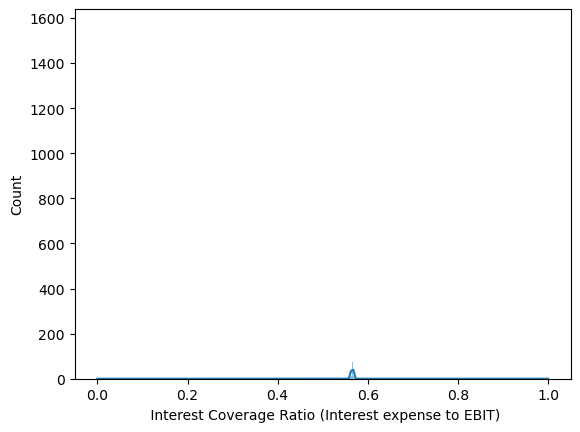

In [13]:
sns.histplot(df[' Interest Coverage Ratio (Interest expense to EBIT)'], kde=True)
plt.show()
#We see the majority falls around 0.56 with low and high outliers

In [14]:
df[' Total expense/Assets'].describe()
#summary statistics for Total expense/Assets

count    6819.000000
mean        0.029184
std         0.027149
min         0.000000
25%         0.014567
50%         0.022674
75%         0.035930
max         1.000000
Name:  Total expense/Assets, dtype: float64

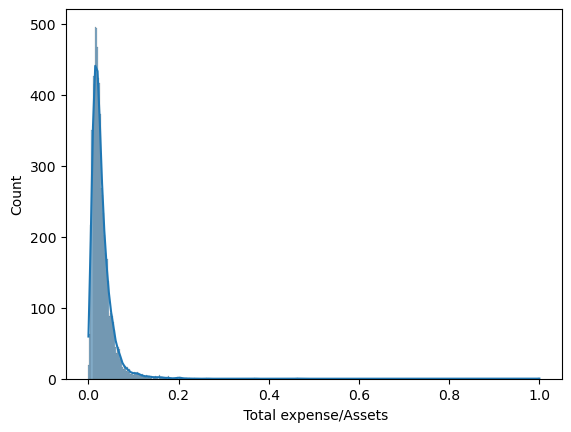

In [15]:
sns.histplot(df[' Total expense/Assets'], kde=True)
plt.show()
#We see it is skewed to the right 

In [16]:
df[' Total Asset Return Growth Rate Ratio'].describe()
#summary statistics for Total Asset Return Growth Rate Ratio

count    6819.000000
mean        0.264248
std         0.009634
min         0.000000
25%         0.263759
50%         0.264050
75%         0.264388
max         1.000000
Name:  Total Asset Return Growth Rate Ratio, dtype: float64

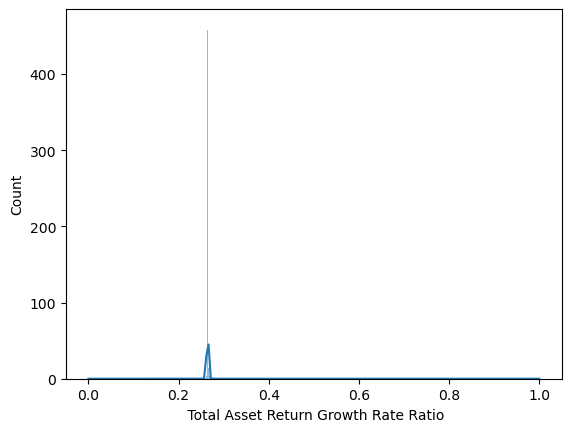

In [17]:
sns.histplot(df[' Total Asset Return Growth Rate Ratio'], kde=True)
plt.show()
#majority falls around 0.26 with low and high outliers

In [17]:
correlation_matrix = df.corr()

print(correlation_matrix)

                                                    Bankrupt  \
Bankrupt                                            1.000000   
 ROA(C) before interest and depreciation before... -0.260807   
 ROA(A) before interest and % after tax            -0.282941   
 ROA(B) before interest and depreciation after tax -0.273051   
 Operating Gross Margin                            -0.100043   
...                                                      ...   
 Liability to Equity                                0.166812   
 Degree of Financial Leverage (DFL)                 0.010508   
 Interest Coverage Ratio (Interest expense to E... -0.005509   
 Net Income Flag                                         NaN   
 Equity to Liability                               -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt                                                                                    -0.260807          
 ROA(C)

In [18]:
#This gives the correlation between all the variables.

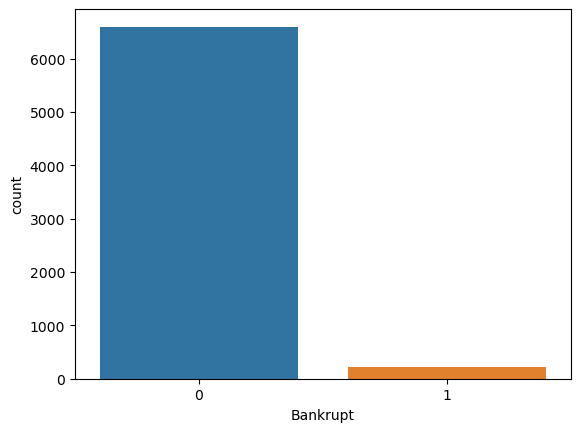

In [19]:
sns.countplot(x=df['Bankrupt'], data=df)
plt.show()
#We see that the classes are imbalanced

In [21]:
majority = df[df['Bankrupt'] == 0]
minority = df[df['Bankrupt'] == 1]
#Seperating the majority and minority classes

In [22]:
undersampled_majority = resample(majority, replace=False, n_samples=len(minority))   

undersampled_data = pd.concat([minority, undersampled_majority])
#Creating an undersampled data set 

In [23]:
undersampled_data.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,...,440.000000,4.400000e+02,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.0,440.000000
mean,0.500000,0.461121,0.505581,0.506352,0.602675,0.602691,0.998875,0.797008,0.808880,0.303055,...,0.772145,5.543182e+07,0.623530,0.602673,0.833270,0.286889,0.027826,0.565543,1.0,0.033638
std,0.500569,0.081572,0.099141,0.088244,0.013571,0.013564,0.000535,0.002306,0.002998,0.003647,...,0.070567,6.321629e+08,0.005391,0.013571,0.054063,0.048946,0.012055,0.009593,0.0,0.044890
min,0.000000,0.024277,0.000000,0.033514,0.532906,0.532906,0.991888,0.757216,0.761550,0.235090,...,0.411809,1.323020e-04,0.587512,0.532907,0.000000,0.000000,0.004429,0.519404,1.0,0.003946
25%,0.000000,0.432677,0.472511,0.477783,0.596542,0.596575,0.998862,0.797106,0.809046,0.303282,...,0.756747,1.066634e-03,0.623175,0.596538,0.835924,0.278362,0.026631,0.564409,1.0,0.018097
50%,0.500000,0.472091,0.529655,0.522539,0.601991,0.601983,0.998971,0.797366,0.809286,0.303450,...,0.792067,2.557296e-03,0.623705,0.601986,0.839847,0.281647,0.026791,0.565158,1.0,0.023463
75%,1.000000,0.504534,0.562268,0.555396,0.607882,0.607891,0.999039,0.797468,0.809377,0.303535,...,0.810229,6.371038e-03,0.624044,0.607880,0.841276,0.286660,0.026873,0.565690,1.0,0.035287
max,1.000000,0.683030,0.767390,0.757963,0.665151,0.666023,0.999417,0.799372,0.811034,0.306126,...,0.907515,9.170000e+09,0.679654,0.665149,1.000000,1.000000,0.264577,0.735958,1.0,0.798122


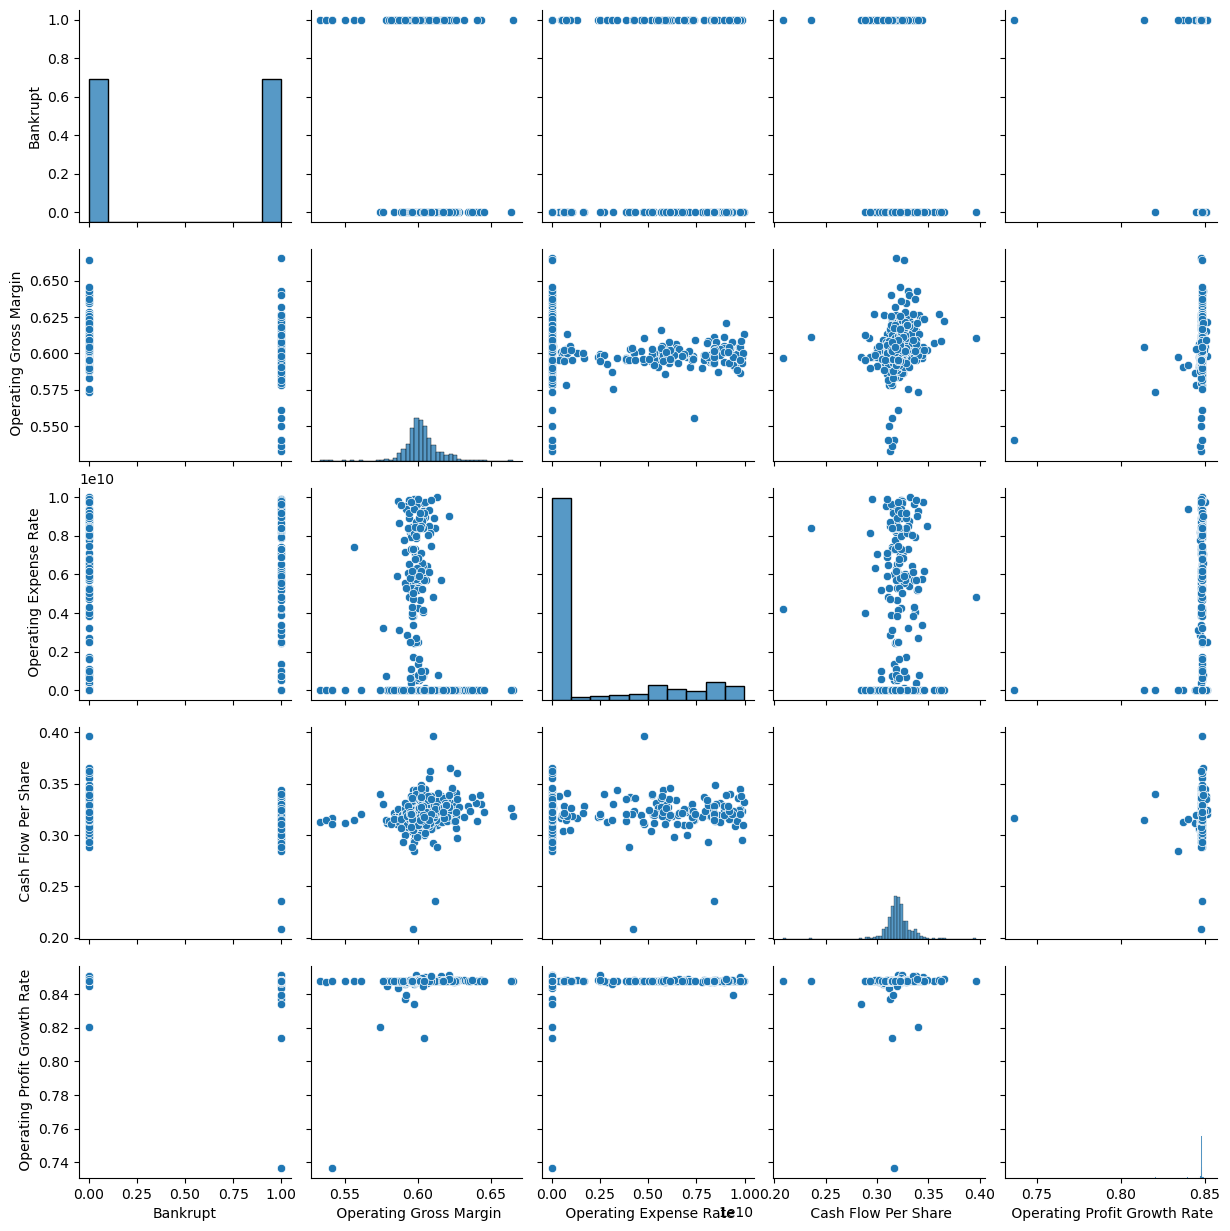

In [24]:
columns = ['Bankrupt', ' Operating Gross Margin', ' Operating Expense Rate', ' Cash Flow Per Share', ' Operating Profit Growth Rate']

sns.pairplot(undersampled_data[columns])
plt.show()
#Graphically showing the correlation among variables in the undersampled data set that I believe are important.

In [25]:
#Splitting the orginal data set into training and testing sets
y = df["Bankrupt"]
x = df.loc[:, df.columns != "Bankrupt"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [26]:
#Part 1

In [27]:
#Random Forrest 

In [28]:
%%time

RF_class = RandomForestClassifier()
RF_class.fit(X_train, y_train)
#Fitting the random forest model using default parameters. It had a CPU time of 4.95s.

CPU times: total: 2.83 s
Wall time: 3.1 s


RandomForestClassifier()

In [29]:
preds = RF_class.predict(X_test)

accuracy = accuracy_score(y_test, preds)
print(accuracy)

0.9711632453567938


In [30]:
precision = precision_score(y_test, preds)
print(precision)

0.7


In [31]:
#It accurately predicted the correct class about 97% of the time, however it accurately predicted positive predictions 52% of the tine with a precision of 0.526.

In [32]:
%%time

RF_class_nonDefault = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
RF_class_nonDefault.fit(X_train, y_train)

#Fitting the random forest model using different parameters. This one only had a CPU time of 2.16s.

CPU times: total: 984 ms
Wall time: 1.24 s


RandomForestClassifier(criterion='entropy', n_estimators=50)

In [33]:
preds2 = RF_class_nonDefault.predict(X_test)

accuracy2 = accuracy_score(y_test, preds2)
print(accuracy2)

0.9682306940371457


In [34]:
precision2 = precision_score(y_test, preds2)
print(precision2)

0.5555555555555556


In [35]:
#I prefer this second model as it had a lower CPU time as well as a slightly higher accuracy of 0.974 and higher precision of 0.736.

In [36]:
%%time

RF_class_crit = RandomForestClassifier(criterion = 'entropy')
RF_class_crit.fit(X_train, y_train)
#Fitting a new model with only changing criterion to comppare entropy to gini.

CPU times: total: 2.12 s
Wall time: 2.4 s


RandomForestClassifier(criterion='entropy')

In [37]:
preds3 = RF_class_crit.predict(X_test)

accuracy3 = accuracy_score(y_test, preds3)
print(accuracy3)

0.969208211143695


In [38]:
precision3 = precision_score(y_test, preds3)
print(precision3)

0.6428571428571429


In [39]:
%%time

RF_class_est = RandomForestClassifier(n_estimators = 50)
RF_class_est.fit(X_train, y_train)
#Fitting a new model with only changing n_estimators to comppare to default

CPU times: total: 1.19 s
Wall time: 1.44 s


RandomForestClassifier(n_estimators=50)

In [40]:
preds4 = RF_class_est.predict(X_test)

accuracy4 = accuracy_score(y_test, preds4)
print(accuracy4)

0.9701857282502444


In [41]:
precision4 = precision_score(y_test, preds4)
print(precision4)

0.6666666666666666


In [42]:
#After comparing all the different combinations between n_estimators and criterion, the best one was setting n_estimators to 50 and criterion to entropy as it had the lowest CPU time and high accuracy and precision scores. It appears entropy did better.

In [43]:
feature_importance = RF_class_nonDefault.feature_importances_
print(feature_importance)
#Getting the feature importance from my second model 

[0.01163672 0.01618314 0.01772936 0.00645162 0.00740819 0.00562611
 0.00688283 0.01944306 0.01751167 0.02122026 0.00781451 0.00533905
 0.00677222 0.01172471 0.00218756 0.01943392 0.01457605 0.01773464
 0.03841196 0.00488241 0.00487182 0.00659316 0.02060076 0.00565922
 0.00609401 0.00578972 0.00394798 0.00630316 0.00795953 0.02428991
 0.00592058 0.00689996 0.00698614 0.01240017 0.0105508  0.03370205
 0.02086139 0.01594937 0.00522036 0.02976736 0.00296498 0.00742029
 0.02162315 0.00503096 0.00396966 0.01044334 0.00769222 0.00707114
 0.00886056 0.0050232  0.01305222 0.00921922 0.01122726 0.00686973
 0.00538185 0.00670807 0.01105883 0.01013406 0.01243726 0.00805629
 0.00635034 0.00717966 0.00961678 0.00514587 0.00659427 0.00866052
 0.00477856 0.02200052 0.01740728 0.00648057 0.00603212 0.0054647
 0.00640957 0.00947733 0.0061416  0.00374597 0.00454347 0.0097399
 0.00577286 0.00655467 0.00750593 0.00459566 0.00517134 0.00689725
 0.         0.01862992 0.0109552  0.00795498 0.00766088 0.030191

In [44]:
df_feature = pd.DataFrame({'Importance': feature_importance})

df_feature['Feature'] = X_train.columns

df_feature = df_feature.sort_values(by='Importance', ascending=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df_feature)


    Importance                                            Feature
18    0.038412            Persistent EPS in the Last Four Seasons
35    0.033702                         Total debt/Total net worth
89    0.030192                 Net Income to Stockholder's Equity
39    0.029767                               Borrowing dependency
94    0.024353                                Equity to Liability
29    0.024290                              Net Value Growth Rate
67    0.022001                  Retained Earnings to Total Assets
42    0.021623              Net profit before tax/Paid-in capital
9     0.021220               Continuous interest rate (after tax)
36    0.020861                                       Debt ratio %
22    0.020601           Per Share Net profit before tax (Yuan ¥)
7     0.019443                        After-tax net Interest Rate
15    0.019434                            Net Value Per Share (B)
90    0.018682                                Liability to Equity
85    0.01

In [45]:
#These rules do make sense as the features with the highest importance are variables that are very important in business and can determine whether or not a company goes bankrupt. Persistent EPS is the top one, and this is something that measures earnings per share, something investors care a lot about. Another important feature is debt ratio, having too much debt can lead to bankruptcy quite easily.One with little importance is tax rate, as this does not matter much company to company. 

In [46]:
#In my case, the model that performed the best actually had the fastest time. However, I did not change many parameters, and I assume that normally a model that takes a long time to fit will actually perform better as it is taking more calculations into account. So the tradeoff is you may give up a fast time for better performance. 

In [47]:
#SVM

In [48]:
%%time

SVM_class = SVC()
SVM_class.fit(X_train, y_train)
#Here I am fitting an SVM with default parameters. It had a CPU time of 828 ms.

CPU times: total: 312 ms
Wall time: 408 ms


SVC()

In [49]:
preds_SVM = SVM_class.predict(X_test)

accuracy_SVM = accuracy_score(y_test, preds_SVM)
print(accuracy_SVM)

0.9672531769305963


In [50]:
#We can see that it made a correct prediction 96.9% of the time as seen from its accuracy.

In [ ]:
%%time

SVM_class_kernel = SVC(kernel='linear')
SVM_class_kernel.fit(X_train, y_train)
#Fitting a SVM setting kernel to linear

In [ ]:
#The default model had a CPU time of 828 ms and an accuracy of 96.7%. The second model took too way too long to run and would not finish in time. I would prefer the first model as it had a very high accuracy and a fast fit time compared to the second one. 

In [ ]:
#Part 2

In [52]:
#Here I am seperating the under sampled data into training and testing.

y_under = undersampled_data["Bankrupt"]
x_under = undersampled_data.loc[:, undersampled_data.columns != "Bankrupt"]

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(x_under, y_under, test_size=0.3)

In [53]:
%%time

RF_class_under = RandomForestClassifier()
RF_class_under.fit(X_train_under, y_train_under)

CPU times: total: 234 ms
Wall time: 280 ms


RandomForestClassifier()

In [54]:
%%time

SVM_class_under = SVC()
SVM_class_under.fit(X_train_under, y_train_under)

CPU times: total: 0 ns
Wall time: 14.1 ms


SVC()

In [55]:
#As we can see, the SVM was faster as it had a CPU time of 0 ns compared to the random forest of 234 ms.

In [56]:
preds_RF = RF_class_under.predict(X_test_under)

accuracy_RF = accuracy_score(y_test_under, preds_RF)
print(accuracy_RF)

0.803030303030303


In [57]:
precision_RF = precision_score(y_test_under, preds_RF)
print(precision_RF)

0.7971014492753623


In [58]:
preds_SVM_under = SVM_class_under.predict(X_test_under)

accuracy_SVM_under = accuracy_score(y_test_under, preds_SVM_under)
print(accuracy_SVM_under)

0.6060606060606061


In [59]:
precision_SVM_under = precision_score(y_test_under, preds_SVM_under)
print(precision_SVM_under)

0.6027397260273972


In [60]:
#However, when looking at the accuracy and precision scores, we see that the random forest had a higher accuarcy and precision. So while it took slightly longer to fit, it performed much better. So, I would prefer the random forest on the undersampled data. 